In [52]:
from mpl_toolkits.mplot3d import Axes3D
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

## Plot function

In [53]:
def plot_2D(x,y,p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

In [54]:
def laplace2d(p,y,dx,dy,iter):
    for i in range(iter):
        pn = p.copy()
        p[1:-1,1:-1] = ( (dy**2)*(pn[1:-1,2:] + pn[1:-1,0:-2])   +   (dx**2)*(pn[2:, 1:-1] + pn[0:-2, 1:-1]) )/(2*(dx**2 + dy**2))
        #set boundary condition:
        p[:,0] = 0
        p[:,-1] = y
        p[0, :] = p[1, :]
        p[-1, :] = p[-2, :]

    return p


# Main

### Grid

In [55]:
Lx = 2.0
Ly = 2.0
nx = 31
ny = 31
dx = Lx/(nx-1)
dy = Ly/(ny-1)
x = numpy.linspace(0,Lx,nx)
y = numpy.linspace(0,Ly,ny)

### Initital and bounday condition

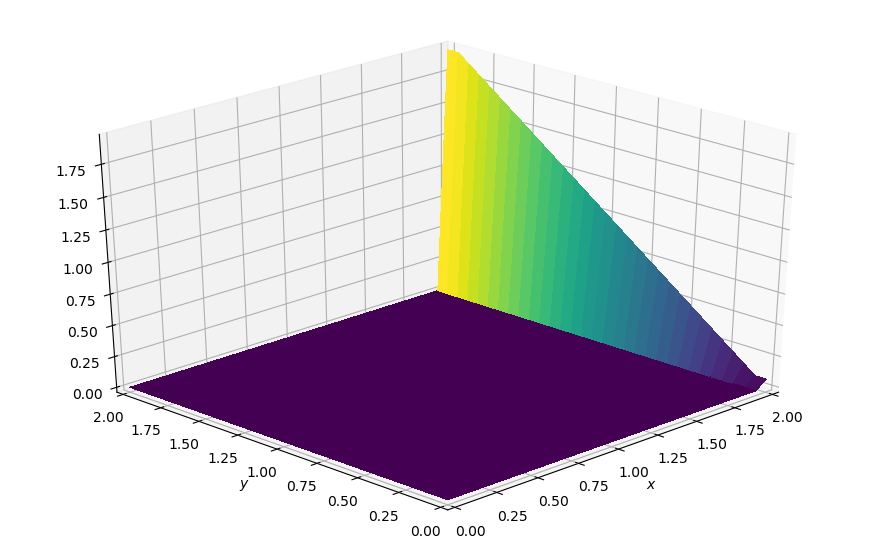

In [56]:
p = numpy.zeros((ny, nx))
p[:, 0] = 0   
p[:, -1] = y   
p[0, :] = p[1, :]   
p[-1, :] = p[-2, :]  
plot_2D(x,y,p)

### Invoke laplace

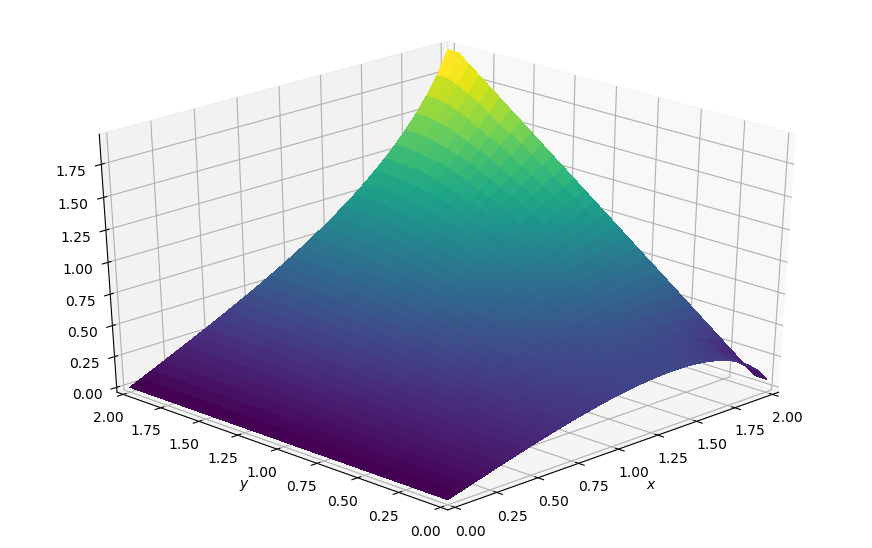

In [57]:

p = laplace2d(p,y,dx,dy,10000) 
plot_2D(x,y,p)

## Load and plot C++ solution

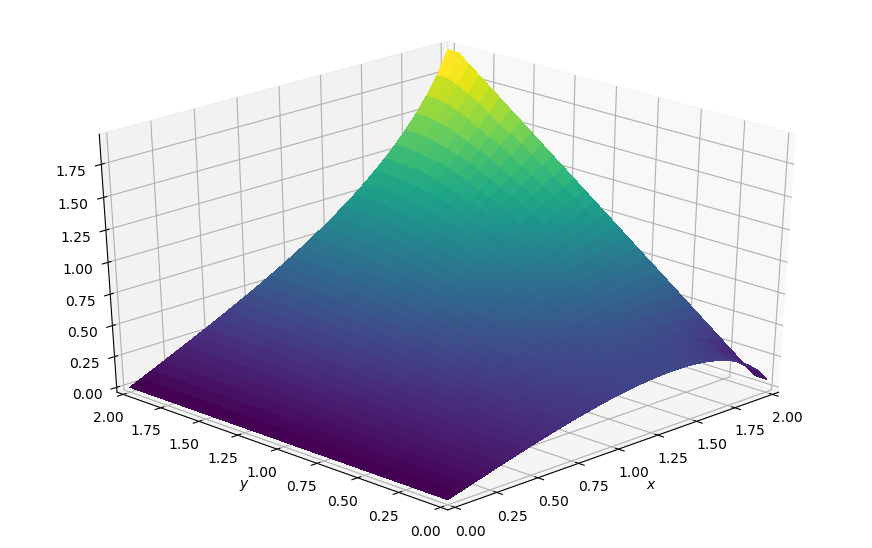

In [58]:
#plot c++ solution
xc = numpy.loadtxt('plot/x.dat')
yc = numpy.loadtxt('plot/y.dat')
pc = numpy.loadtxt('plot/u.dat')

plot_2D(xc,yc,pc)



### Error

In [59]:
error = p - pc
from numpy import linalg as LA
LA.norm(error)

1.6589226157118602e-11